# Introduction to Data Science in Python

**Introduction to Data Science in Python** was the first course in the **Applied Data Science with Python** specialization. This notebook shows my work for the three assignments that I had to solve during this course:
* **Data Processing with Pandas and Numpy**

This assignment introduced data manipulation and cleaning techniques using the popular python pandas data science library and introduced the abstraction of the DataFrame as the central data structure for data analysis. 
* **Advanced Pandas usage**

In this assignment I was asked to use pandas to answer more difficult questions. I definitely feel that I have learned a lot on this assignment as I had to search and investigate a lot of issues on StackOverflow. This made my knowledge of this library stronger as I had spent quite a few time analysing its different functions.
* **Statistical analysis in Python - hypothesis testing**

In this assignment I was asked to conduct a hypothesis testing using three different datasets. It gave me a glimpse on how I could run inferential statistical analyses.


## Data Processing with Pandas and Numpy
----

### Part 1
The following code loads the olympics dataset (olympics.csv), which was derived from the Wikipedia entry on [All Time Olympic Games Medals](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), and does some basic data cleaning. This dataset will be used to answer the questions below.

In [1]:
import pandas as pd

df = pd.read_csv('datasets/olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


### What is the first country in df?

In [2]:
print(df.iloc[0].name)

Afghanistan


### Which country has won the most gold medals in summer games?

In [3]:
print(df['Gold'].argmax())

United States


### Which country had the biggest difference between their summer and winter gold medal counts?

In [4]:
print(df.loc[abs(df['Gold']-df['Gold.1'])==abs(df['Gold']-df['Gold.1']).max()].iloc[0].name)

United States


### Which country has the biggest difference between their summer and winter gold medal counts relative to their total gold medal count? 
Includes countries that have won at least 1 gold in both summer and winter.

In [5]:
df['rel_diff'] = abs(df['Gold']-df['Gold.1'])/(df['Gold']+df['Gold.1'])
df.sort_values(by='rel_diff', ascending=False, inplace=True)
print(df.loc[(df['Gold']>=1)&(df['Gold.1']>=1)].iloc[0].name)

Bulgaria


### Function to update the dataframe to include a new column called 'Points'
'Points' - includes weighted values where each gold medal counts for 3 points, silver medals for 2 points, and bronze medals for 1 point. 

In [6]:
df['Points'] = 3*df['Gold.2']+2*df['Silver.2']+df['Bronze.2']
print(df.ix[:,'Points'][0:5])

Algeria         27
Peru             9
Pakistan        19
Nigeria         37
New Zealand    203
Name: Points, dtype: int64


### Part 2

For the next set of questions, we will be using census data from the [United States Census Bureau](http://www.census.gov/popest/data/counties/totals/2015/CO-EST2015-alldata.html). Counties are political and geographic subdivisions of states in the United States. This dataset contains population data for counties and states in the US from 2010 to 2015. [See this document](http://www.census.gov/popest/data/counties/totals/2015/files/CO-EST2015-alldata.pdf) for a description of the variable names.

### Which state has the most counties in it?

In [7]:
census_df = pd.read_csv('datasets/census.csv')
county_count = census_df[census_df.SUMLEV==50].groupby(['STNAME'])['COUNTY'].count()
print(county_count.argmax())

Texas


### Only looking at the three most populous counties for each state, what are the three most populous states (in order of highest population to lowest population)?

In [8]:
best_counties = (census_df[census_df.SUMLEV==50]
                 .groupby(['STNAME'])['CENSUS2010POP']
                 .apply(lambda x:x.nlargest(3).sum()))
print(best_counties.sort_values(ascending=False).iloc[0:3].index.tolist())

['California', 'Texas', 'Illinois']


### Which county has had the largest change in population within the five year period?

In [9]:
import numpy as np

pop_columns = ['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013',
               'POPESTIMATE2014','POPESTIMATE2015']

temp = census_df[census_df.SUMLEV==50].copy()
temp['diff_total'] = np.zeros(len(temp))

for i in range(len(pop_columns)-1,0,-1):
    temp['diff_total'] += abs(temp[pop_columns[i]]-temp[pop_columns[i-1]])
    ct = temp.ix[temp['diff_total'].idxmax(),'CTYNAME']
    
print(ct)

Harris County


### Query that finds the counties that belong to regions 1 or 2, whose name starts with 'Washington', and whose POPESTIMATE2015 was greater than their POPESTIMATE 2014.

In [10]:
ans = census_df.loc[((census_df.REGION==1)|(census_df.REGION==2))&(census_df['CTYNAME'].str.contains('Washington'))
                    &(census_df.POPESTIMATE2015>census_df.POPESTIMATE2014),['STNAME', 'CTYNAME']]

ans

,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County


## Advanced Python Pandas
----

### First dataframe 
Energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013.

### Second dataframe
GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). 

### Third dataframe
[Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102), which ranks countries based on their journal contributions in the aforementioned area. 

A new dataset is created by joining the three datasets: GDP, Energy, and ScimEn using the intersection of country names.
Only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15) were used. 

### Data cleaning and processing

In [12]:
import pandas as pd
import numpy as np
import re

df = pd.read_excel('datasets/Energy Indicators.xls', skiprows=18, skip_footer=38, header=None, na_values='...')
df.drop([0,1], axis=1,inplace=True)
df.rename(columns={2:"Country",3: "Energy Supply",4: "Energy Supply per Capita",5: "% Renewable"}, inplace=True)
df.loc[:,['Energy Supply']] = df.loc[:,['Energy Supply']]*1000000 
df['Country'] = [re.sub(r'\d+', '', x) for x in df['Country']]

df.loc[df.Country=='Republic of Korea','Country'] = 'South Korea'
df.loc[df.Country=='United States of America','Country'] = 'United States'
df.loc[df.Country=='United Kingdom of Great Britain and Northern Ireland','Country'] = 'United Kingdom'
df.loc[df.Country=='China, Hong Kong Special Administrative Region','Country'] = 'Hong Kong'

df['Country'] = df['Country'].str.split('(', expand=True)[0].str.strip()

GDP = pd.read_csv('datasets/world_bank.csv', header=4)
GDP.loc[GDP['Country Name']=="Korea, Rep.", 'Country Name'] = "South Korea"
GDP.loc[GDP['Country Name']=="Iran, Islamic Rep.", 'Country Name'] = "Iran"
GDP.loc[GDP['Country Name']=="Hong Kong SAR, China", 'Country Name'] = "Hong Kong"

ScimEn = pd.read_excel('datasets/scimagojr-3.xlsx')

GDP_subset = pd.concat([GDP['Country Name'], GDP.ix[:,-10:]], axis=1)
merged_df = GDP_subset.merge(df, left_on='Country Name', right_on='Country', how='inner')
merged_df = merged_df.merge(ScimEn, left_on='Country', right_on='Country', how='inner')
merged_df.drop('Country Name', axis=1, inplace=True)
merged_df.set_index('Country', inplace=True)
merged_df = merged_df[merged_df.Rank<=15]

The code above joined three datasets then reduced this to just the top 15 entries. 
### When we joined the datasets, but before we reduced this to the top 15 items, how many entries did we lose?

In [13]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
    <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
    <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
    <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
    <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [14]:
num_outer = len(pd.concat([ScimEn['Country'],df['Country'],GDP_subset['Country Name']]).unique())
num_inter = (GDP_subset.merge(df, left_on='Country Name', right_on='Country', how='inner')
           .merge(ScimEn, left_on='Country', right_on='Country', how='inner').shape[0])

print(num_outer-num_inter)

156


### What are the top 15 countries for average GDP over the last 10 years?

In [15]:
Top15 = merged_df.copy()
Top15['avgGDP'] = Top15.ix[:,0:10].mean(axis=1,skipna=True)
Top15.sort_values(by='avgGDP', ascending=False, inplace=True)

print(Top15.ix[:,-1])

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


### By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

In [16]:
print(Top15.ix[5,9]-Top15.ix[5,0])

246702696075.0


### What is the mean energy supply per capita?

In [17]:
print(Top15['Energy Supply per Capita'].mean())

157.6


### What country has the maximum % Renewable and what is the percentage?

In [18]:
Top15.sort_values(by='% Renewable',ascending=False,inplace=True)
(country, percentage) = (Top15.ix[0].name, Top15.ix[0]['% Renewable'])
print('Country: ', country)
print('Percentage: ', np.round(percentage, 2))

Country:  Brazil
Percentage:  69.65


### What is the maximum value for this new column, and what country has the highest ratio?

In [19]:
Top15['rel_self_cit'] = Top15['Self-citations']/Top15['Citations']
Top15.sort_values(by='rel_self_cit', ascending=False, inplace=True)
(country, ratio) = (Top15.ix[0].name, Top15.ix[0]['rel_self_cit'])
print('Country: ', country)
print('Ratio: ', np.round(ratio, 2))

Country:  China
Ratio:  0.69


### What is the third most populous country according to the population using Energy Supply and Energy Supply per capita?

In [20]:
Top15['PopEst'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
Top15.sort_values(by='PopEst',ascending=False,inplace=True)
print(Top15.ix[2].name)

United States


### What is the correlation between the number of citable documents per capita and the energy supply per capita?

In [21]:
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
print(Top15[['Energy Supply per Capita','Citable docs per Capita']].corr().ix[0,1])

0.794001043544


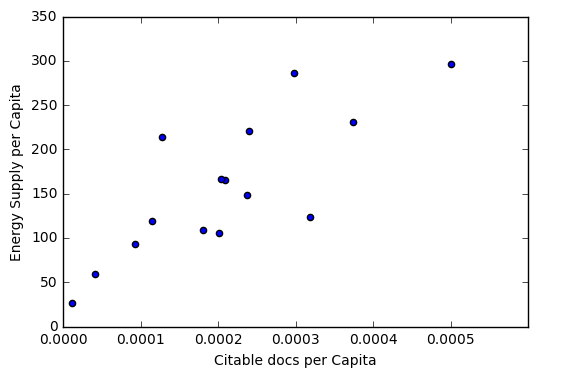

In [22]:
def plot9():
    import matplotlib as plt
    %matplotlib inline 
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', 
               kind='scatter', xlim=[0, 0.0006])
    
plot9()

### Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15.


In [23]:
Top15['HighRenew'] = 0
Top15.loc[Top15['% Renewable']>=Top15['% Renewable'].median(),'HighRenew'] = 1
Top15.sort_values(by=['Rank'], inplace=True)
print(Top15.loc[:,'HighRenew'])

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64


### Create a dataframe that displays the sample size, and the sum, mean, and std deviation for the estimated population of each country.


In [24]:
ContinentDict  = pd.Series({'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russian Federation':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'})

Top15['Continent'] = [ContinentDict[x] for x in Top15.index]
f = {'PopEst':['count','sum','mean','std']}
df = Top15.groupby(['Continent']).agg(f)
df['PopEst'].rename(columns={'count':'size'})

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Convert the Population Estimate series to a string with thousands separator (using commas)


In [25]:
Top15['PopEst'] = ['{:,}'.format(x) for x in Top15['PopEst']]

print(Top15['PopEst'][0:5])

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Name: PopEst, dtype: object


### Bubble plot

This is an example of a visualization that can be created to help understand the data. 
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 
2014 GDP, and the color corresponds to the continent.

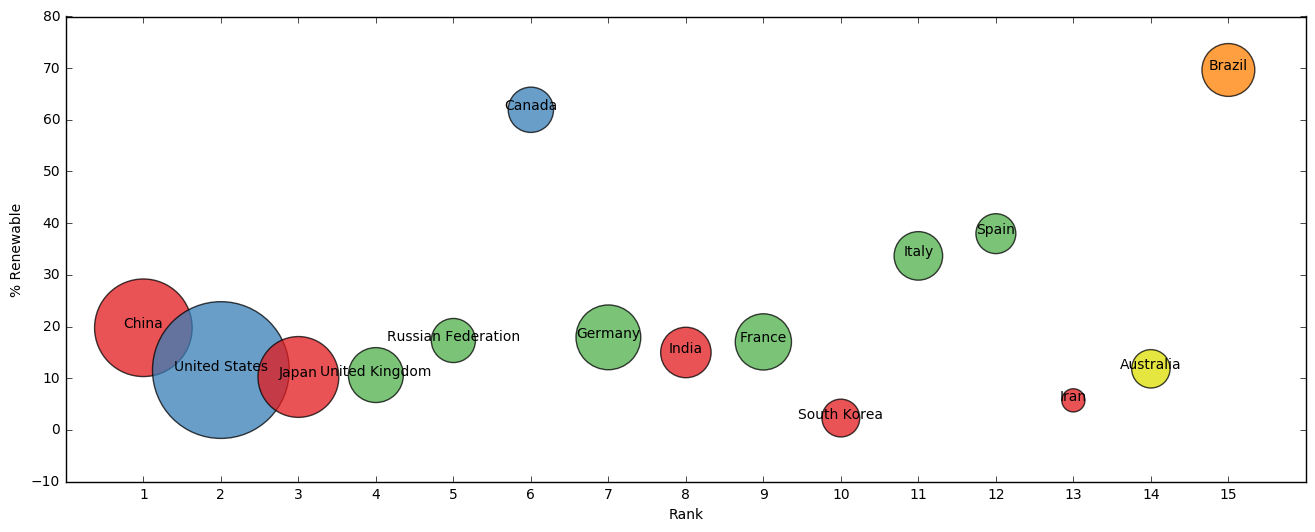

In [26]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')
    
plot_optional()

## Statistical Analysis in Python
----

### Hypothesis Testing

**Hypothesis**: University towns have their mean housing prices less effected by recessions. This analysis runs a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. 

`price_ratio=quarter_before_recession/recession_bottom`

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

The following data files were available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (we use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. 

For this assignment, we only look at GDP data from the first quarter of 2000 onward.


In [27]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [28]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [29]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame is:
    DataFrame( [ ["Michigan","Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State","RegionName"]  )'''
    uni = pd.read_table('datasets/university_towns.txt', sep='\t', header=None, names=['RegionName'])
    uni['State'] = [x.split('[')[0] if 'edit' in x else np.nan for x in uni['RegionName']]
    uni['State'].fillna(method='ffill', inplace=True)
    uni['RegionName'] = uni['RegionName'].str.split('(',expand=True)[0].str.split('[', expand=True)[0].str.rstrip()
    uni = uni.loc[uni.RegionName!=uni.State, ['State','RegionName']]
    return uni

In [30]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    gdp_usa = pd.read_excel('datasets/gdplev.xls', skiprows=5, usecols=[4,6], 
                            names=['Year&Quarter', 'GDP_chained_2009_dollars'])
    gdp_usa.dropna(axis=0, how='all', inplace=True)
    gdp_usa['year'] = [int(x[0:4]) for x in gdp_usa['Year&Quarter']]
    gdp_usa['quarter'] = [x[4:] for x in gdp_usa['Year&Quarter']]
    gdp_usa = gdp_usa[gdp_usa['year']>=2000]
    gdp_usa['recession'] = gdp_usa['GDP_chained_2009_dollars'].diff(periods=1)
    gdp_usa.reset_index(drop=True, inplace=True)
    gdp_usa['recessionStart'] = False
    for i in range(1,len(gdp_usa)-1):
        if (gdp_usa.loc[i,'recession']<0)&(gdp_usa.loc[i+1,'recession']<0):
            gdp_usa.loc[i,'recessionStart'] = True
    ans = gdp_usa.loc[gdp_usa[gdp_usa.recessionStart==True].index.min(),'Year&Quarter']
    return ans

In [31]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    gdp_usa = pd.read_excel('datasets/gdplev.xls', skiprows=5, usecols=[4,6],
                            names=['Year&Quarter','GDP_chained_2009_dollars'])
    gdp_usa.dropna(axis=0, how='all', inplace=True)
    gdp_usa['year'] = [int(x[0:4]) for x in gdp_usa['Year&Quarter']]
    gdp_usa['quarter'] = [x[4:] for x in gdp_usa['Year&Quarter']]
    gdp_usa = gdp_usa[gdp_usa['year']>=2000]
    gdp_usa['recession'] = gdp_usa['GDP_chained_2009_dollars'].diff(periods=1)
    gdp_usa.reset_index(drop=True, inplace=True)
    gdp_usa['recessionEnd'] = False
    for i in range(3,len(gdp_usa)):
        if ((gdp_usa.loc[i-3,'recession']<0)&(gdp_usa.loc[i-2,'recession']<0)&
            (gdp_usa.loc[i-1,'recession']>0)&(gdp_usa.loc[i,'recession']>0)):
            gdp_usa.loc[i,'recessionEnd'] = True  
    ans = gdp_usa.loc[gdp_usa[gdp_usa.recessionEnd==True].index.min(),'Year&Quarter']
    return ans

In [32]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in a format such as 2005q3'''
    import pandas as pd
    gdp_usa = pd.read_excel('datasets/gdplev.xls', skiprows=5, usecols=[4,6], names=[
                'Year&Quarter','GDP_chained_2009_dollars'])
    gdp_usa.dropna(axis=0, how='all', inplace=True)
    gdp_usa['year'] = [int(x[0:4]) for x in gdp_usa['Year&Quarter']]
    gdp_usa['quarter'] = [x[4:] for x in gdp_usa['Year&Quarter']]
    gdp_usa = gdp_usa[gdp_usa['year']>=2000]
    gdp_usa['recession'] = gdp_usa['GDP_chained_2009_dollars'].diff(periods=1)
    gdp_usa.reset_index(drop=True, inplace=True)
    gdp_usa['recessionStart'] = False
    gdp_usa['recessionEnd'] = False
    for i in range(1,len(gdp_usa)-1):
        if (gdp_usa.loc[i,'recession']<0)&(gdp_usa.loc[i+1,'recession']<0):
            gdp_usa.loc[i,'recessionStart'] = True
    for i in range(3,len(gdp_usa)):
        if ((gdp_usa.loc[i-3,'recession']<0)&(gdp_usa.loc[i-2,'recession']<0)&
            (gdp_usa.loc[i-1,'recession']>0)&(gdp_usa.loc[i,'recession']>0)):
            gdp_usa.loc[i,'recessionEnd'] = True  
    recessionStart = gdp_usa[gdp_usa['recessionStart']==True].index.min()
    recessionEnd = gdp_usa[gdp_usa['recessionEnd']==True].index.min()
    df_rec = gdp_usa.ix[recessionStart:recessionEnd,:]
    ans = df_rec.loc[df_rec['GDP_chained_2009_dollars']==df_rec['GDP_chained_2009_dollars'].min(),'Year&Quarter'] 
    return ans.values[0]

In [33]:
def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. The resulting dataframe should have 67 
    columns, and 10,730 rows.
    '''
    all_homes = pd.read_csv('datasets/City_Zhvi_AllHomes.csv')
    all_homes['State'] = all_homes['State'].map(states)
    all_homes.drop(all_homes.filter(regex='19').columns, axis=1, inplace=True)
    all_homes.columns = (all_homes.columns.str.replace('-01', 'q1').str.replace('-02', 'q1')
                         .str.replace('-03', 'q1').str.replace('-04', 'q2').str.replace('-05', 'q2')
                         .str.replace('-06', 'q2').str.replace('-07', 'q3').str.replace('-08', 'q3')
                         .str.replace('-09', 'q3').str.replace('-10', 'q4').str.replace('-11', 'q4')
                         .str.replace('-12', 'q4'))
    all_homes = (all_homes.set_index(['State','RegionName'], drop=True)
               .drop(['RegionID','Metro','CountyName','SizeRank'],axis=1))          
    all_homes = all_homes.groupby(by=all_homes.columns, axis=1).mean() 
    
    return all_homes

In [37]:
def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Returns the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p is equal to
    the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    df = convert_housing_data_to_quarters()
    beforeRecession = (df.columns.get_loc(get_recession_start())-1)
    recessionBottom = df.columns.get_loc(get_recession_bottom())
    uni = get_list_of_university_towns().set_index(['State', 'RegionName'])
    df = np.divide(df.ix[:,recessionBottom],df.ix[:,beforeRecession]).to_frame().dropna()
    uni_df = df.merge(uni, right_index=True, left_index=True, how='inner')
    nonuni_df = df.drop(uni_df.index)
    p_value = ttest_ind(uni_df.values, nonuni_df.values).pvalue
    if p_value<0.01:
        different=True
    else:
        different=False
    if uni_df.mean().values>nonuni_df.mean().values:
        better='University town'
    else:
        better='non-university town'

    return (different, p_value[0], better)

In [38]:
different, p_value, better = run_ttest()
print('Different? ', different)
print('P value: ', p_value)
print('Better? ', better)

Different?  True
P value:  0.00336292287686
Better?  University town
